In [23]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
with open('export_mitigation.json', 'r') as f:
    data = json.load(f)

In [2]:
features = []
for app in data:
    features.extend(app['features'])

feature_counts = Counter(features)

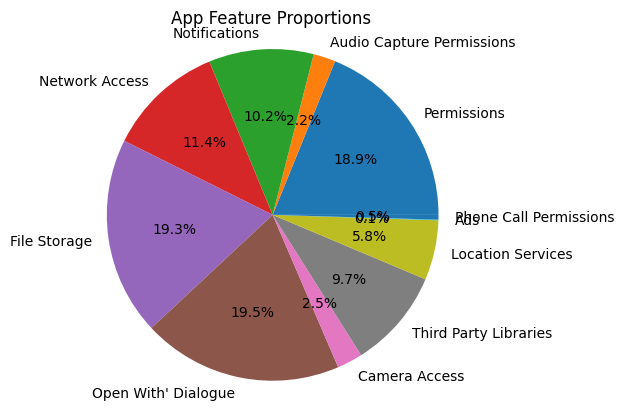

In [18]:
labels = feature_counts.keys()
sizes = feature_counts.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('App Feature Proportions')

plt.savefig('app_feature_proportions.png', dpi=300, bbox_inches='tight')

plt.show()

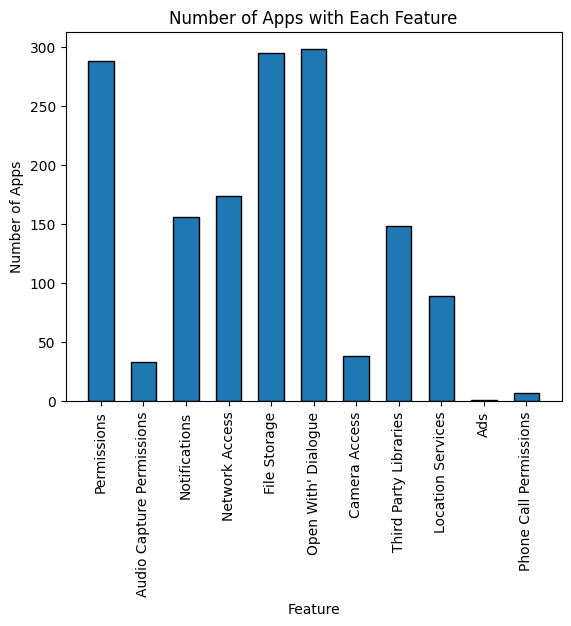

In [27]:
# Create a bar chart of the feature counts
labels = list(feature_counts.keys())
values = list(feature_counts.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Apps')
plt.title('Number of Apps with Each Feature')
plt.show()

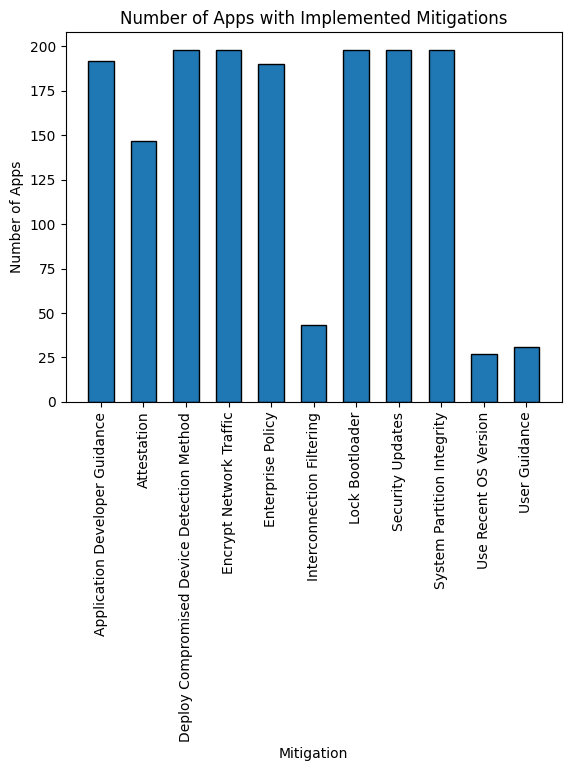

In [30]:
# Count the number of apps that have implemented each mitigation
mitigations_count = defaultdict(int)
for app in data:
    mitigations = app['mitigations']
    if isinstance(mitigations, list):
        continue  # skip apps with no mitigations
    for mitigation, value in mitigations.items():
        if value == 0:
            mitigations_count[mitigation] += 1

# Create a bar chart of the mitigations count
labels = list(mitigations_count.keys())
values = list(mitigations_count.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Mitigation')
plt.ylabel('Number of Apps')
plt.title('Number of Apps with Implemented Mitigations')
plt.show()

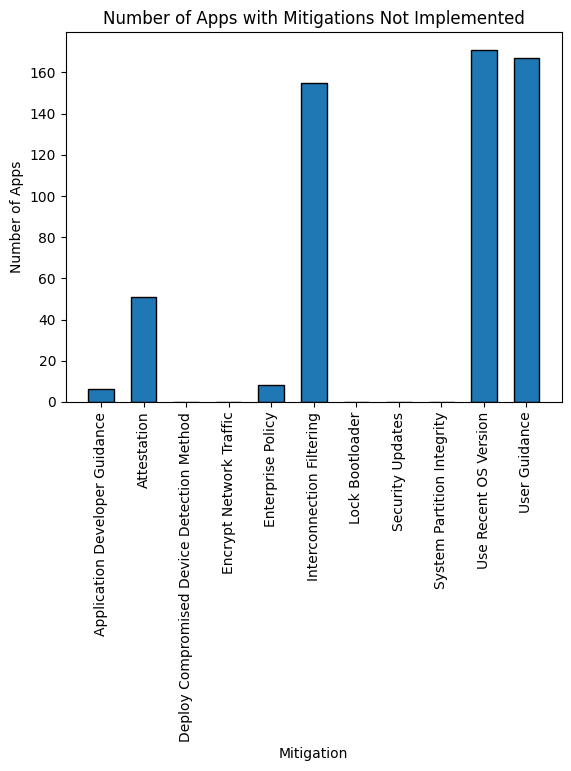

In [31]:
# Count the number of apps that have implemented each mitigation
mitigations_count = defaultdict(int)
for app in data:
    mitigations = app['mitigations']
    if isinstance(mitigations, list):
        continue  # skip apps with no mitigations
    for mitigation, value in mitigations.items():
        mitigations_count[mitigation] += (value > 0)

# Create a bar chart of the mitigations count
labels = list(mitigations_count.keys())
values = list(mitigations_count.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Mitigation')
plt.ylabel('Number of Apps')
plt.title('Number of Apps with Mitigations Not Implemented')
plt.show()

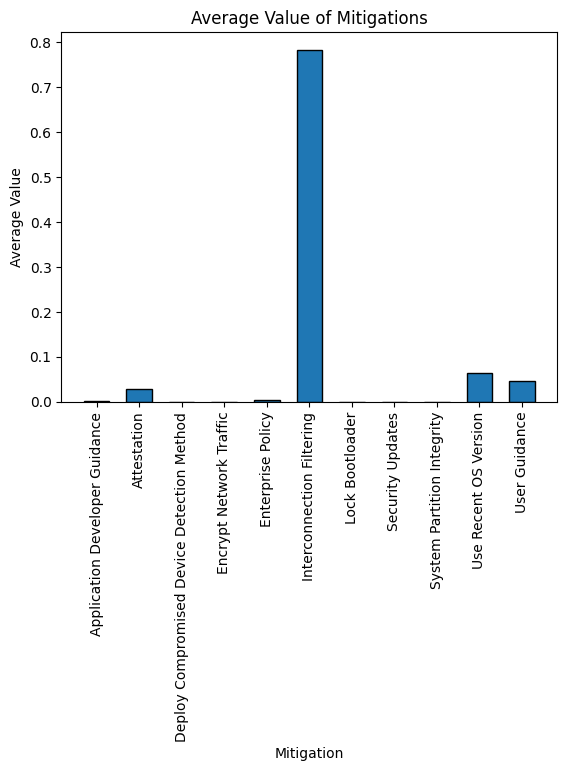

In [26]:
# Calculate the average value of each mitigation
mitigations_count = defaultdict(list)
for app in data:
    mitigations = app['mitigations']
    if isinstance(mitigations, list):
        continue  # skip apps with no mitigations
    for mitigation, value in mitigations.items():
        mitigations_count[mitigation].append(value)

# Calculate the average value for each mitigation
mitigations_avg = {mitigation: sum(values) / len(values) for mitigation, values in mitigations_count.items()}

# Create a bar chart of the mitigations average value
labels = list(mitigations_avg.keys())
values = list(mitigations_avg.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Mitigation')
plt.ylabel('Average Value')
plt.title('Average Value of Mitigations')
plt.show()